In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

# Plotting Code

In [2]:
labels_14 = [  
            'Atelectasis',
            'Cardiomegaly',
            'Consolidation',
            'Edema',
            'Enlarged Cardiomediastinum',
            'Fracture',
            'Lung Lesion',
            'Lung Opacity',
            'No Finding',
            'Pleural Effusion',
            'Pleural Other',
            'Pneumonia',
            'Pneumothorax',
            'Support Devices']
labels_9 = [
            'lung opacity', 
            'pleural effusion', 
            'atelectasis', 
            'enlarged cardiac silhouette',
            'pulmonary edema/hazy opacity', 
            'pneumothorax', 
            'consolidation', 
            'fluid overload/heart failure', 
            'pneumonia']
labels_6 = [
            'lung opacity', 
            'pleural effusion', 
            'atelectasis', 
            'enlarged cardiac silhouette',
            'pulmonary edema/hazy opacity', 
            'consolidation',]

In [3]:
def my_plot(file_name: str, method_name: str, all_lables: list=labels_9):
    with open(file_name, 'r') as f:
        saved_metrics = f.read().split('\n')

    MAP, MRR, MHR = [], [], []

    for line in saved_metrics:
        for lbl in all_lables:
            if lbl in line:
                cur_out = line.split('|')[2:5]
                cur_out = [float(x) for x in cur_out]
                MAP.append(cur_out[0])
                MHR.append(cur_out[1])
                MRR.append(cur_out[2])

    MAP = np.array(MAP)
    MRR = np.array(MRR)
    MHR = np.array(MHR)

    # plot all three quantitites in one plot
    # make it a horizontal bar plot of MAP, MHR, MRR for each label along with the value printed on the bar
    fig, ax = plt.subplots(figsize=(10, 10))
    y_pos = np.arange(len(all_lables))
    width = 0.25
    ax.barh(y_pos - width, MAP, width, align='center', color='blue', ecolor='black', label='mAP')
    ax.barh(y_pos, MHR, width, align='center', color='green', ecolor='black', label='mHR')
    ax.barh(y_pos + width, MRR, width, align='center', color='red', ecolor='black', label='mRR')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(all_lables)
    ax.invert_yaxis()
    ax.set_xlabel('mAP, mHR, mRR')
    ax.set_title(f'{method_name}\nmAP {MAP.mean():.4f}, mHR {MHR.mean():.4f}, mRR {MRR.mean():.4f}')
    
    # print value beside the bar
    for i, v in enumerate(MAP):
        ax.text(v + 0.01, i - width + 0.1, f'{np.round(v, 2):.2f}', color='blue', fontweight='bold')
    for i, v in enumerate(MHR):
        ax.text(v + 0.01, i + 0.1, f'{np.round(v, 2):.2f}', color='green', fontweight='bold')
    for i, v in enumerate(MRR):
        ax.text(v + 0.01, i + width + 0.1, f'{np.round(v, 2):.2f}', color='red', fontweight='bold')
    ax.legend()
    plt.show()


# Peroformance Comparision Ignoring 3 Labels

## Condensed Labels (6 classes)

### Baseline

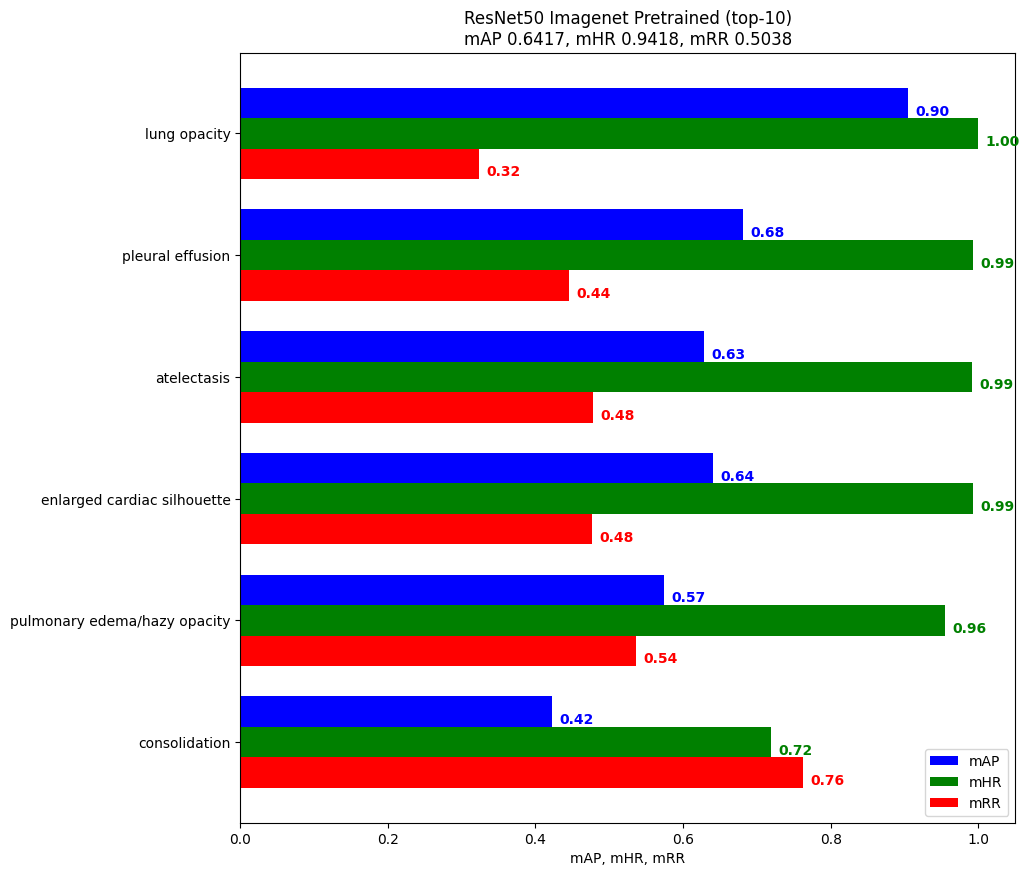

In [4]:
my_plot('output/resnet50_9_classes_imagenet_pretrained.txt', 'ResNet50 Imagenet Pretrained (top-10)', labels_6)

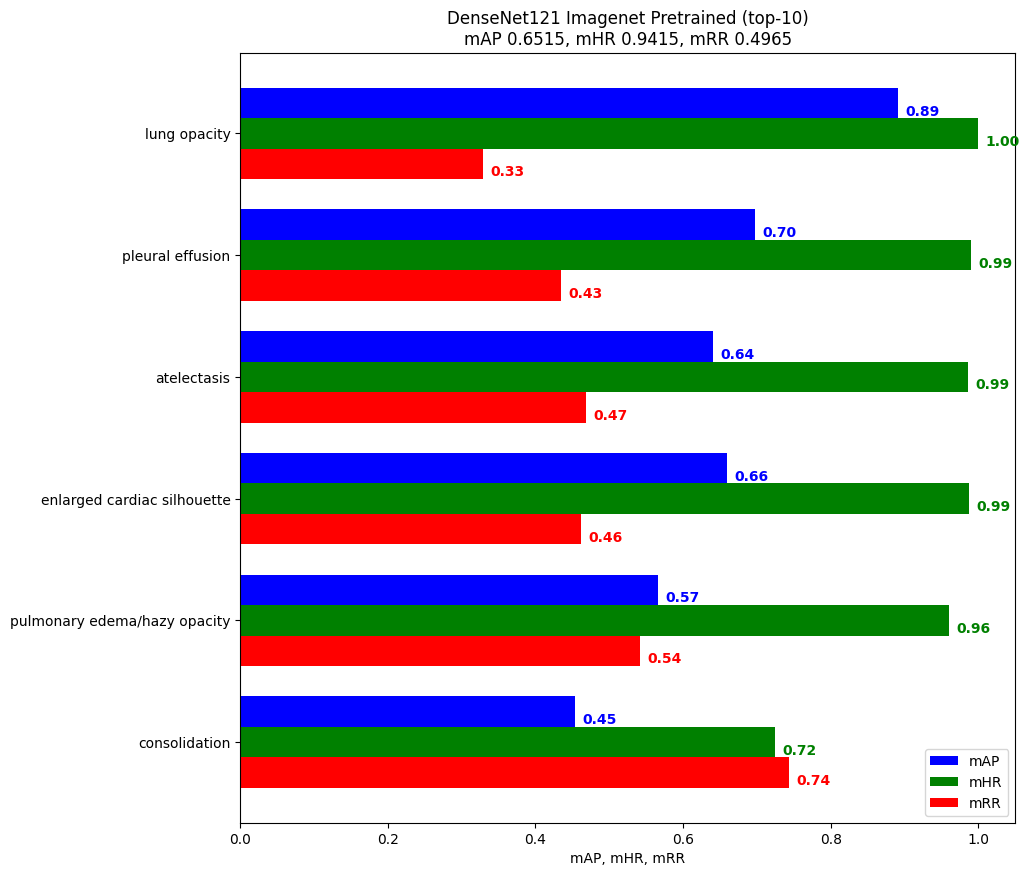

In [5]:
my_plot('output/densenet_9_classes_imagenet_pretrained.txt', 'DenseNet121 Imagenet Pretrained (top-10)', labels_6)

### Graph

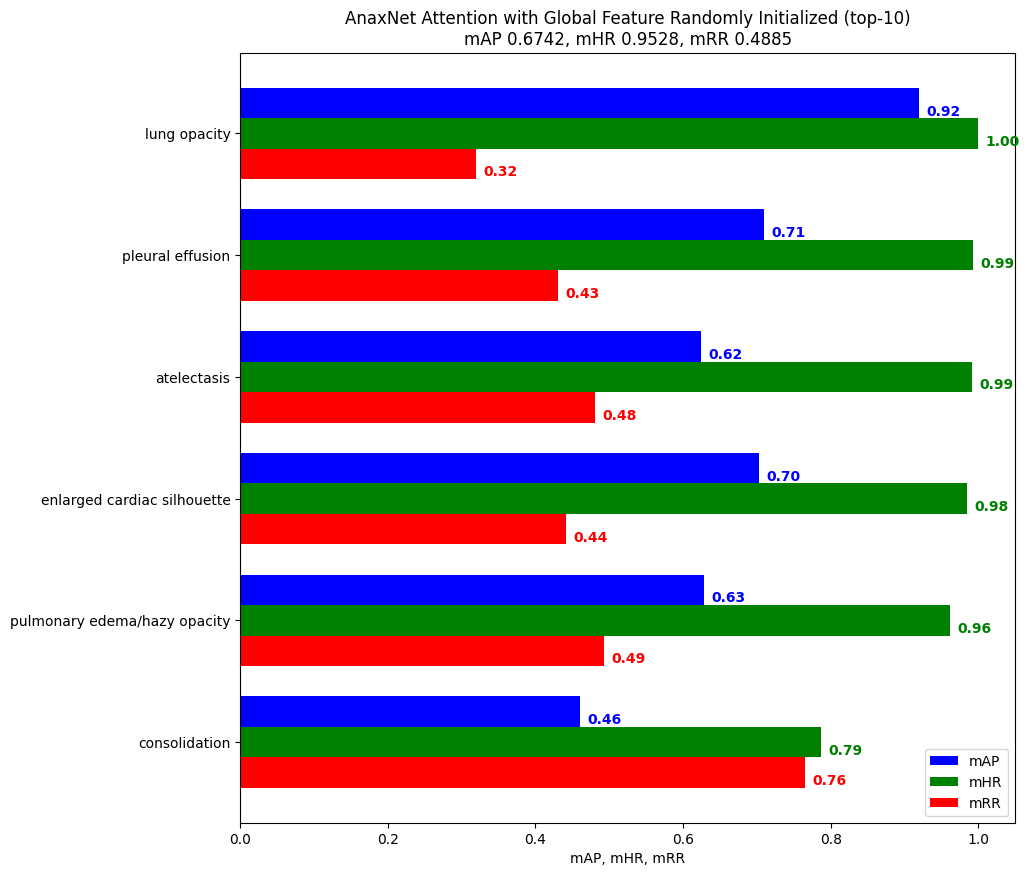

In [6]:
my_plot('output/anaxnet_attn_complete_9_classes_randomly_initialized.txt', 'AnaxNet Attention with Global Feature Randomly Initialized (top-10)', labels_6)

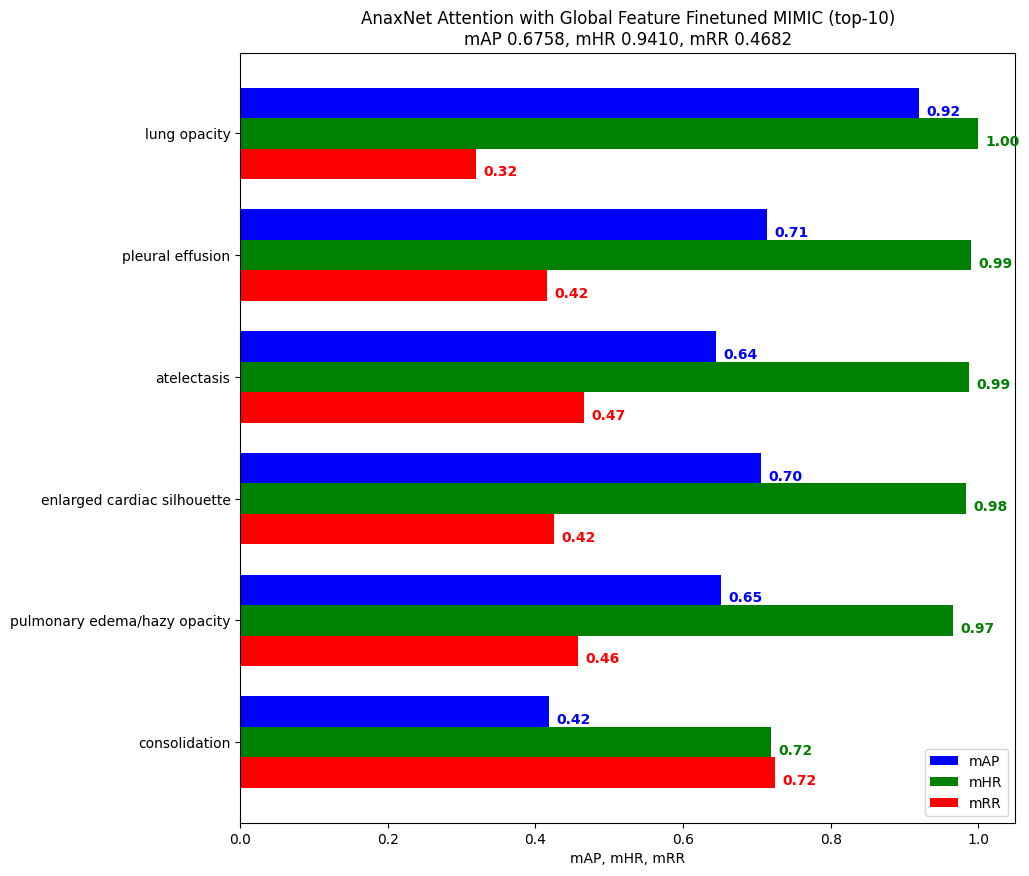

In [7]:
my_plot('output/anaxnet_attn_complete_9_classes_auc.txt', 'AnaxNet Attention with Global Feature Finetuned MIMIC (top-10)', labels_6)

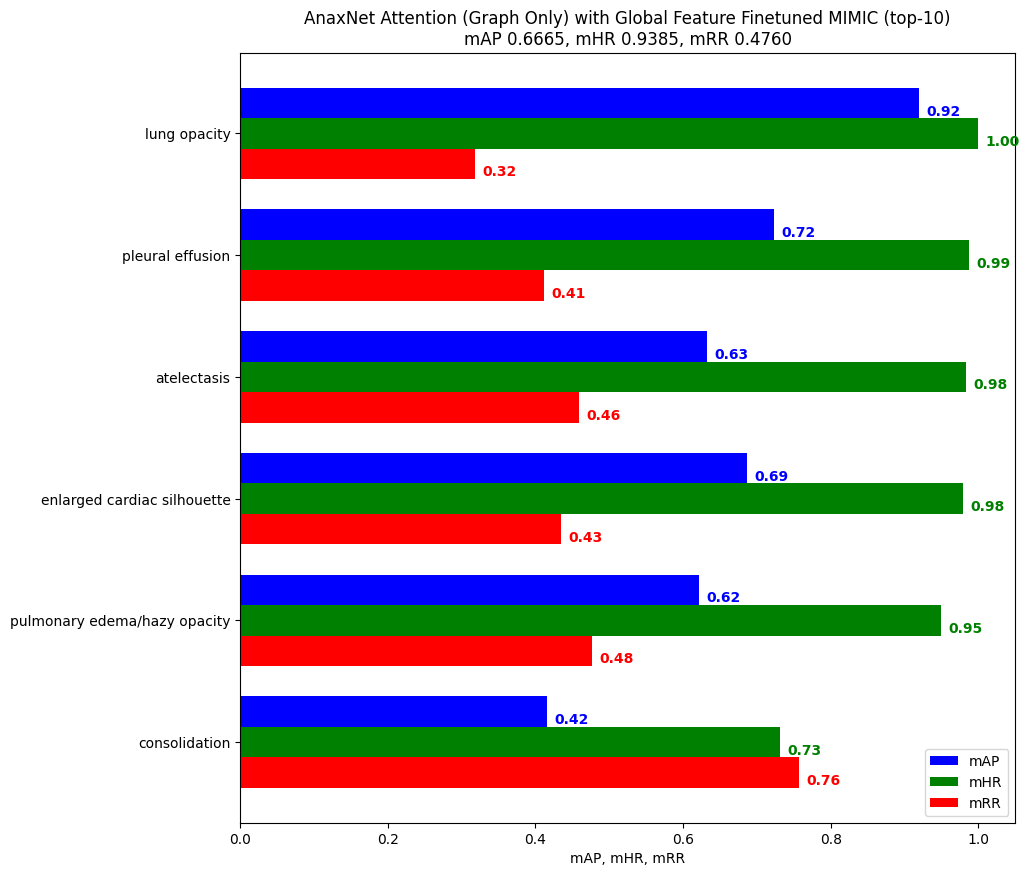

In [8]:
my_plot('output/anaxnet_attn_graph_only_9_classes_auc.txt', 'AnaxNet Attention (Graph Only) with Global Feature Finetuned MIMIC (top-10)', labels_6)

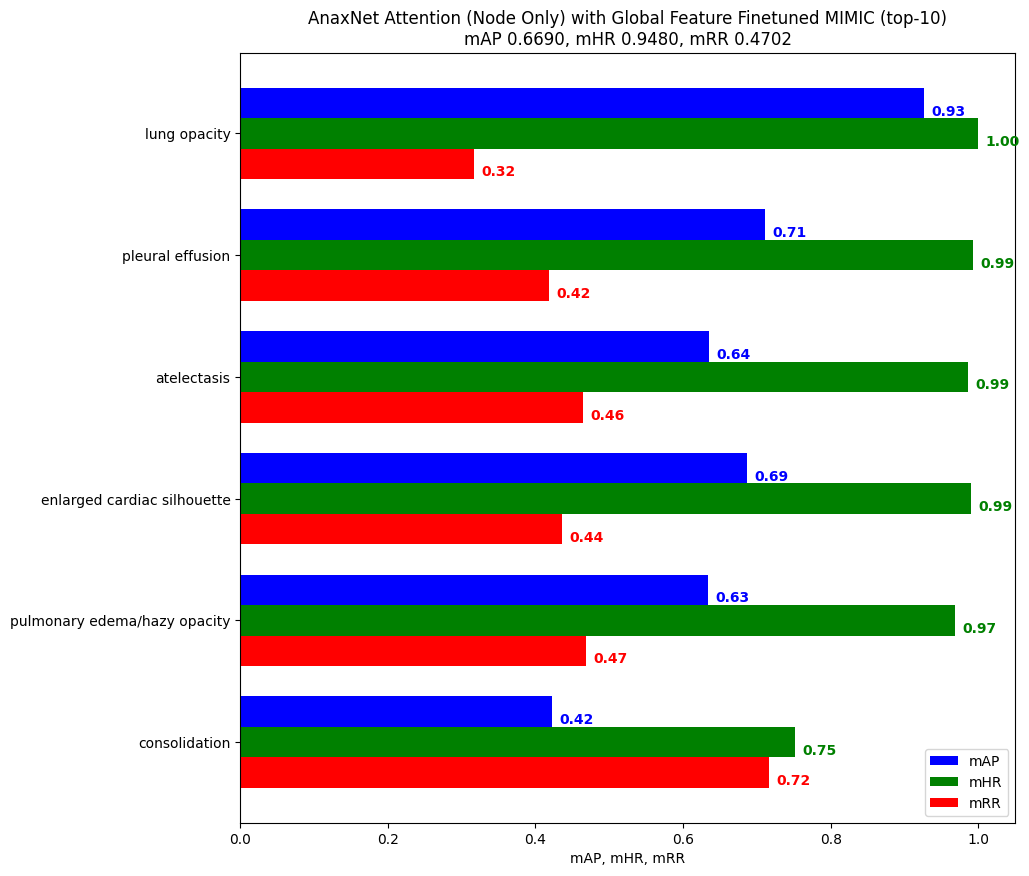

In [9]:
my_plot('output/anaxnet_attn_node_only_9_classes_auc.txt', 'AnaxNet Attention (Node Only) with Global Feature Finetuned MIMIC (top-10)', labels_6)

## All Labels (9 classes)

### Baseline

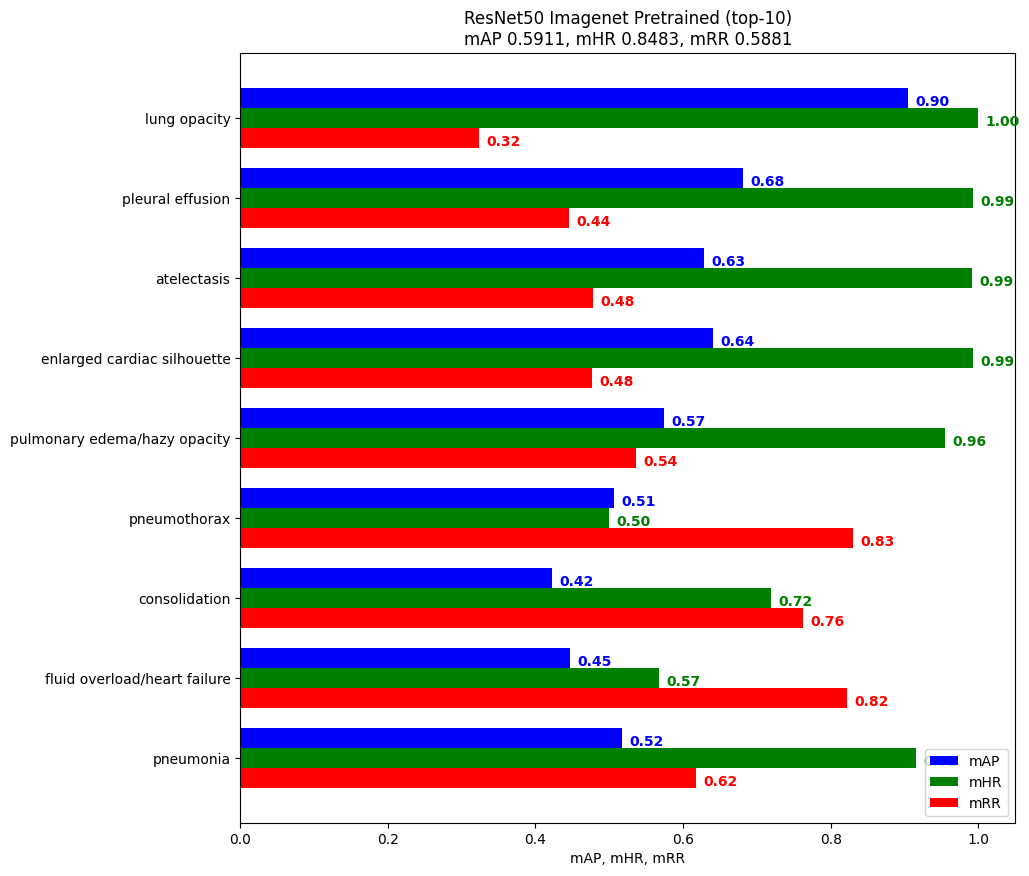

In [10]:
my_plot('output/resnet50_9_classes_imagenet_pretrained.txt', 'ResNet50 Imagenet Pretrained (top-10)', labels_9)

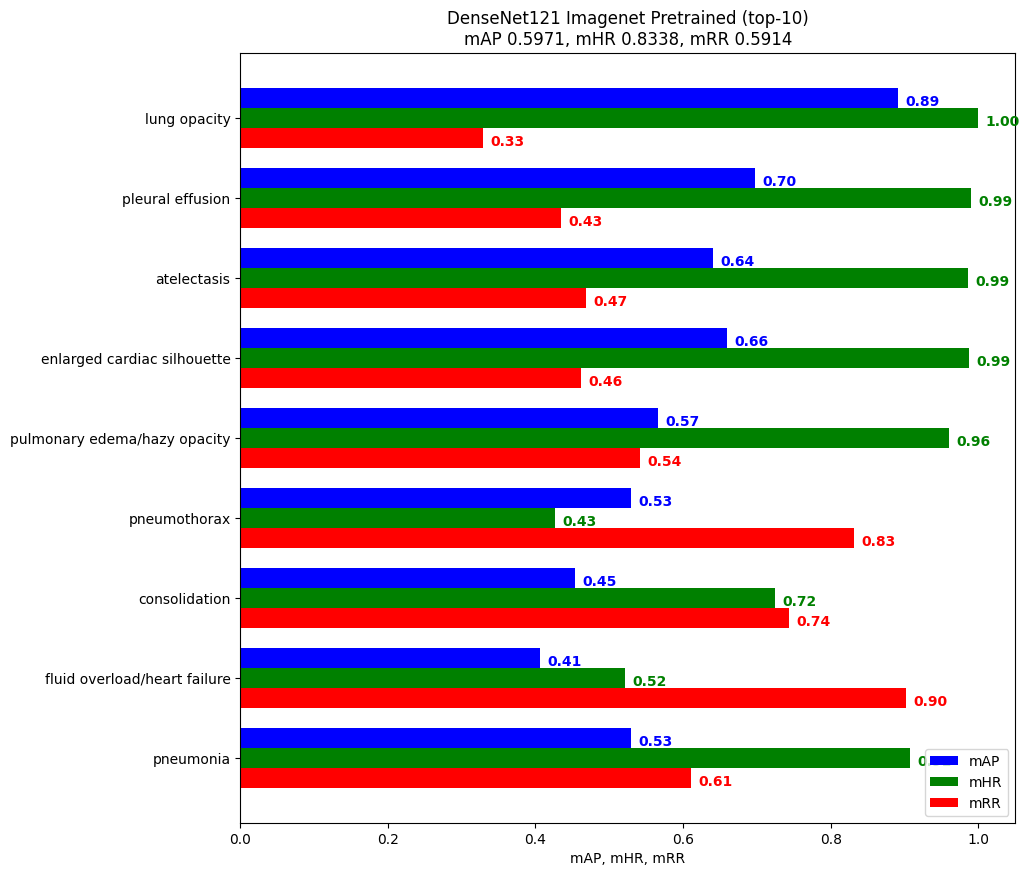

In [11]:
my_plot('output/densenet_9_classes_imagenet_pretrained.txt', 'DenseNet121 Imagenet Pretrained (top-10)', labels_9)

### Graph

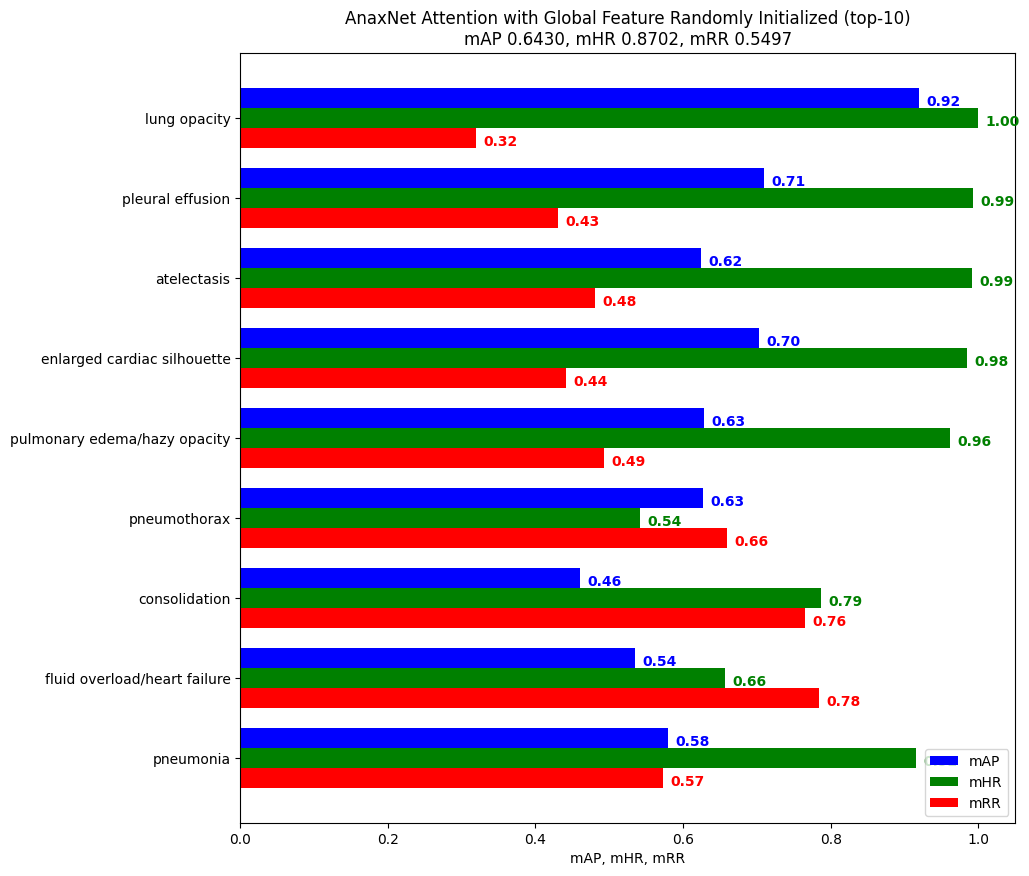

In [12]:
my_plot('output/anaxnet_attn_complete_9_classes_randomly_initialized.txt', 'AnaxNet Attention with Global Feature Randomly Initialized (top-10)', labels_9)

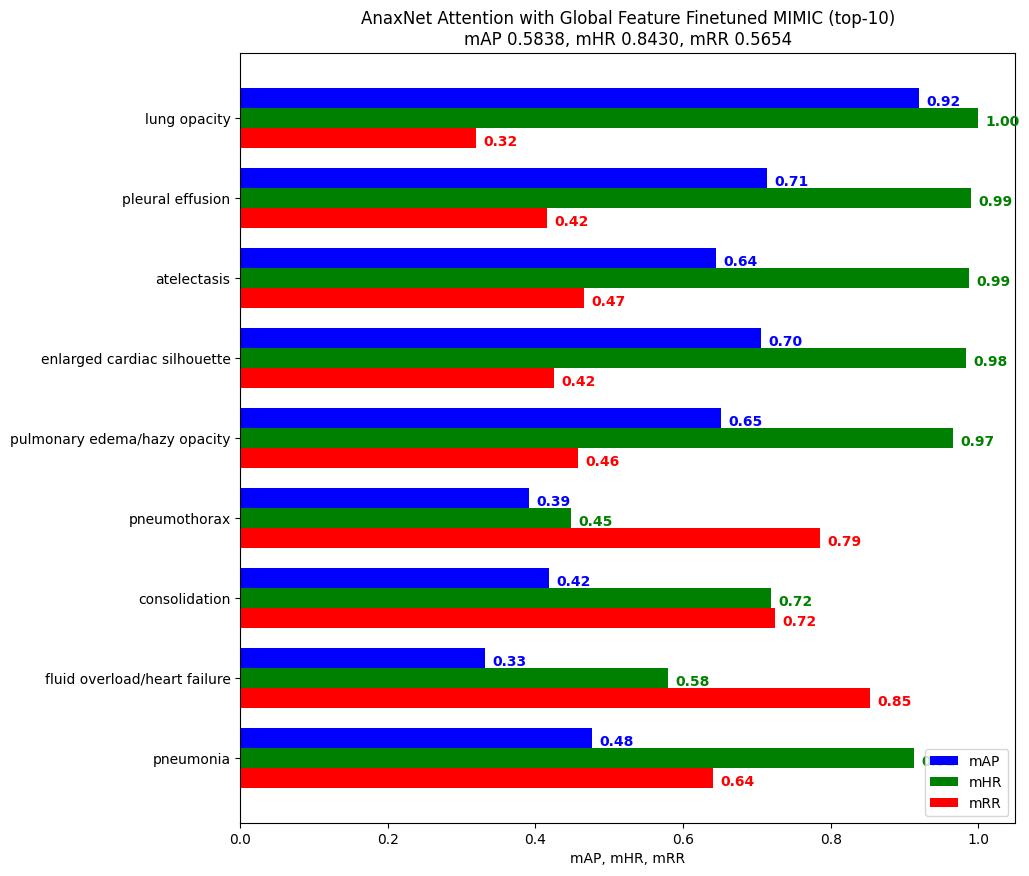

In [13]:
my_plot('output/anaxnet_attn_complete_9_classes_auc.txt', 'AnaxNet Attention with Global Feature Finetuned MIMIC (top-10)', labels_9)

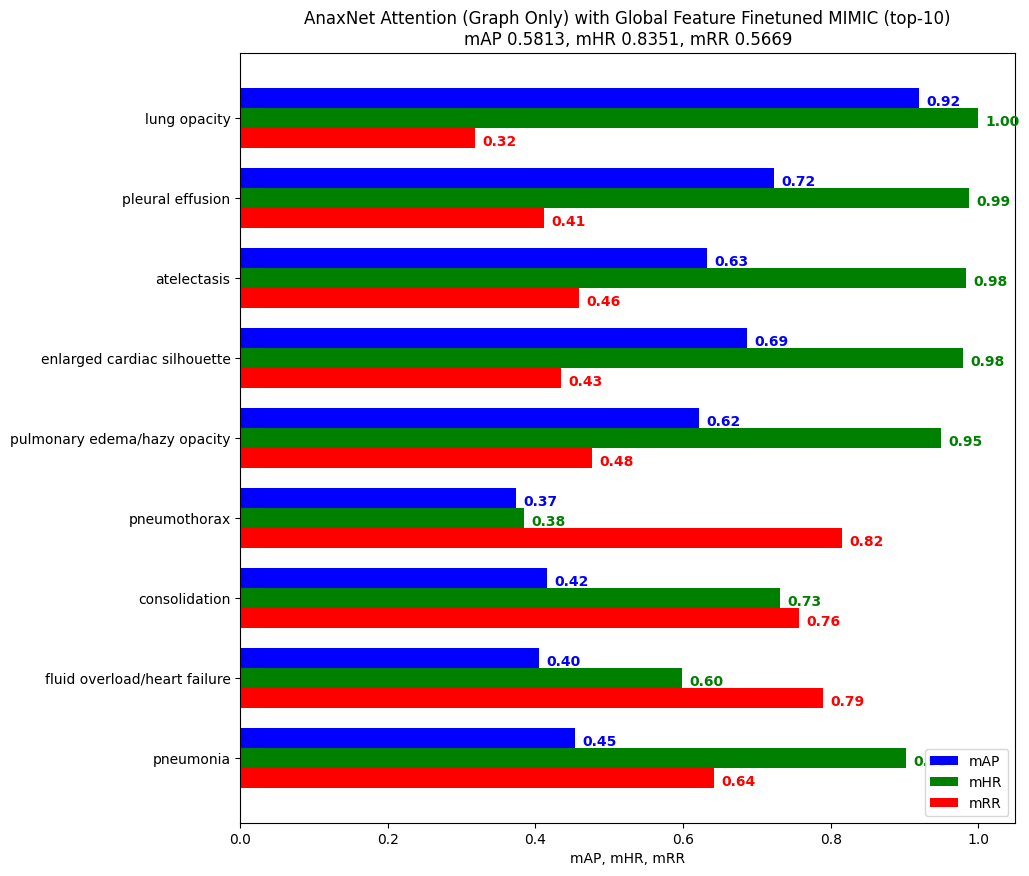

In [14]:
my_plot('output/anaxnet_attn_graph_only_9_classes_auc.txt', 'AnaxNet Attention (Graph Only) with Global Feature Finetuned MIMIC (top-10)', labels_9)

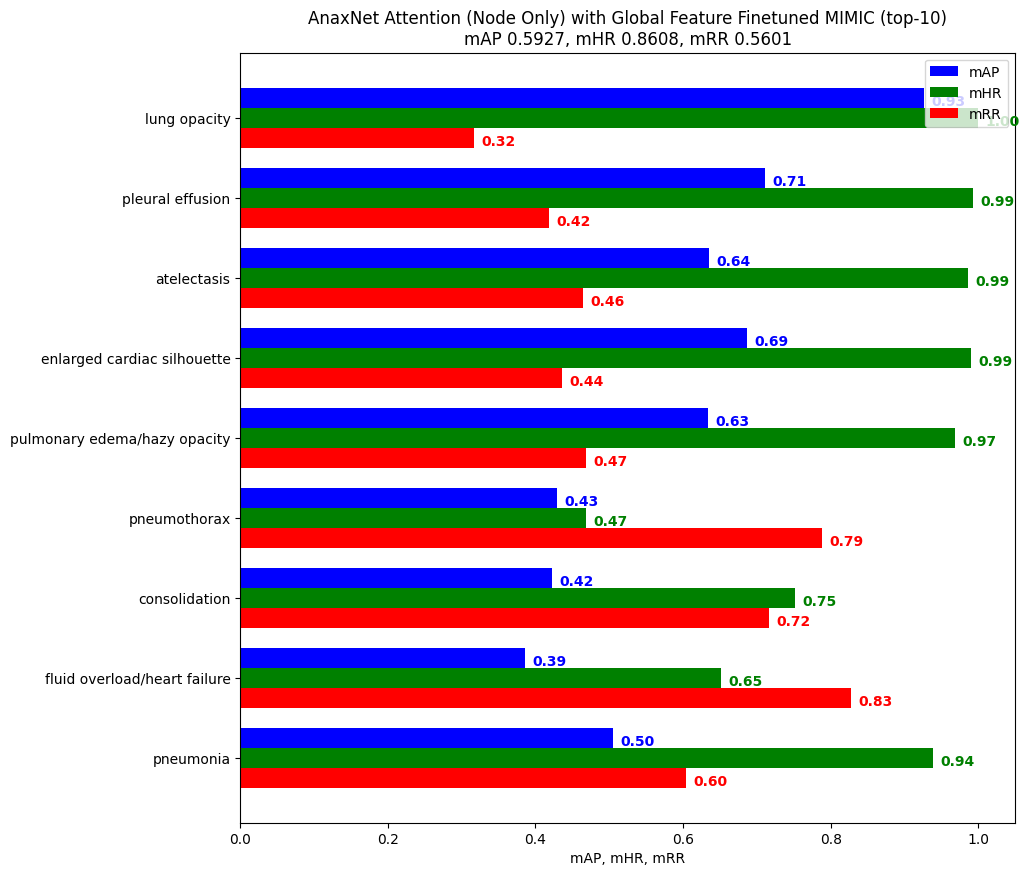

In [15]:
my_plot('output/anaxnet_attn_node_only_9_classes_auc.txt', 'AnaxNet Attention (Node Only) with Global Feature Finetuned MIMIC (top-10)', labels_9)